# Sample

In [2]:
from ast import Param
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

cancer = load_breast_cancer()
X_train_all, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=2)),
    ('lr', LogisticRegression(max_iter=1000))
])

# 하이퍼 파라미터 그리드
param_grid = {
    'svd__n_components': [2, 5, 10],
    'lr__C': [0.1, 1.0, 10.0]
}

# GridSearchCV 객체 생성, gkrtmq
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_all, y_train)

print("Best parameters found : ", grid_search.best_params_)

# 평가 사용자함수
def evaluate_model(model, X_test, y_test):
    #예측수행
    y_pred = model.predict(X_test)
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    # 분류보고서 작성
    report = classification_report(y_test, y_pred)
    # ROC AUC 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # 결과 출력
    print(f'accuracy: {accuracy:.4f}')
    print('\nClassification Report:')
    print(report)
    print(f'Test ROC AUC: {roc_auc:.4f}')

# 최적 모델을 사용하여 테스트 결과 평가
evaluate_model(grid_search, X_test, y_test)

Best parameters found :  {'lr__C': 1.0, 'svd__n_components': 10}
accuracy: 0.9580

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Test ROC AUC: 0.9922


### California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요.
- 전체 회귀모델을 적용
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.decomposition import TruncatedSVD

# 전처리 사용자함수
def custom_transform(X):
    df = pd.DataFrame(X, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
    # 다중공선성 'AveRooms', 'AveBedrms' 병합 / Latitude 삭제
    df['AveRoomBed'] = df['AveRooms'] * df['AveBedrms']
    df.drop(['AveRooms', 'AveBedrms'], axis=1, inplace=True)
    df.drop(['Latitude'], axis=1, inplace=True)
    return df.values

# 회귀모델 사용자 함수
def evaluate_regression_models(X, y):
    results = {}

    # 전체 회귀모델
    models = {
    # 'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    # 'RandomForestRegressor': RandomForestRegressor(random_state=0),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0),
    'XGBRegressor': XGBRegressor(),
    # 'LGBMRegressor': LGBMRegressor(),
    # 'Ridge': Ridge(),
    # 'Lasso': Lasso(),
    # 'ElasticNet': ElasticNet()
    }

    # 공통 파라미터
    para_common = {
        'n_estimators': [100, 200], # 500 제외
        'max_depth': [5, 10], # 30 제외
        'learning_rate': [0.01, 0.1, 0.2],
        'alpha': [0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.9],
        'model__min_samples_split' : [2, 5, 10],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__max_features':['auto', 'sqrt', 'log2']
    }

    # GridSearchCV
    param_grids = {
        # 'DecisionTreeRegressor': {
        #     'model__max_depth': para_common['max_depth'],
        #     'model__min_samples_split': para_common['model__min_samples_split'],
        #     'model__max_features': para_common['model__max_features']
        # },
        # 'RandomForestRegressor': {
        #     'model__n_estimators': para_common['n_estimators'],
        #     'model__max_depth': para_common['max_depth'],
        #     'model__min_samples_split': para_common['model__min_samples_split'],
        #     'model__min_samples_leaf': [1, 2, 4]  # 유일한 파라미터
        # },
        'GradientBoostingRegressor': {
            'model__n_estimators': para_common['n_estimators'],
            'model__learning_rate': para_common['learning_rate'],
            'model__subsample': para_common['model__subsample'],
            'model__max_features': para_common['model__max_features']
        },
        'XGBRegressor': {
            'model__n_estimators': para_common['n_estimators'],
            'model__learning_rate': para_common['learning_rate'],
            'model__subsample': para_common['model__subsample'],
            'model__gamma': [0, 0.1, 0.2, 0.3]
        },
        # 'LGBMRegressor': {
        #     'model__n_estimators': para_common['n_estimators'],
        #     'model__learning_rate': para_common['learning_rate'],
        #     'model__num_leaves': [31, 63, 127],
        #     'model__min_child_samples': [20, 50, 100]
        # },
        # 'Ridge': {
        #     'model__alpha': para_common['alpha'],
        #     'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
        # },
        # 'Lasso': {
        #     'model__alpha': para_common['alpha'],
        #     'model__selection': ['cyclic', 'random']
        # }
        # 'ElasticNet': {
        #     'model__alpha': para_common['alpha'],
        #     'model__l1_ratio': para_common['l1_ratio']
        # }
    }

    for name, model in models.items():
        # 파이프라인 전처리, 표준화, 데이터축소, 모델학습
        pipeline = Pipeline([
            ('preprocessor', FunctionTransformer(func=custom_transform, validate=False)),
            ('scaler', StandardScaler()),
            # ('svd', TruncatedSVD(n_components=2)),
            ('model', model)
        ])

        # GridSearchCV 설정
        grid_search = GridSearchCV(pipeline, param_grids[name], scoring='neg_mean_squared_error', cv=5, verbose=1)
        grid_search.fit(X, y)

        # 최적 모델로 MSE 평가
        best_model = grid_search.best_estimator_
        mse_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5)
        avg_mse = -np.mean(mse_scores)

        results[name] = {
            'best_params': grid_search.best_params_,
            'average_mse': avg_mse
        }

    # 결과 출력
    for name, result in results.items():
        print(f'#############  {name}  #############')
        print(f'최적 하이퍼파라미터: {result["best_params"]}')
        print(f'5 폴드 세트의 평균 MSE: {result["average_mse"]:.4f}')
        print()

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 예제 데이터셋 로드
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 분포도 확인
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

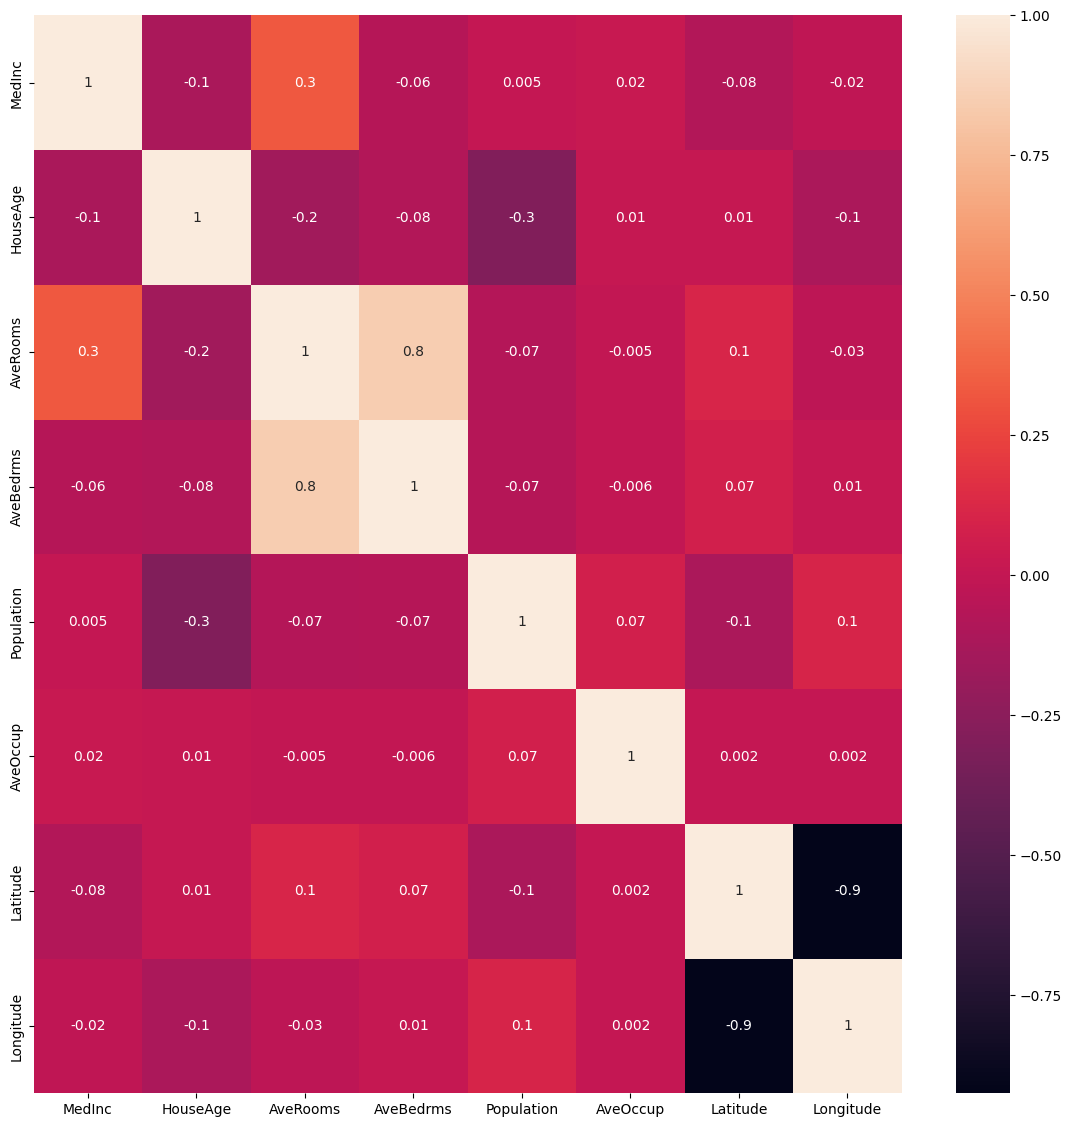

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 회귀모델 DecisionTreeRegressor / LGBMRegressor / ElasticNet 평가 결과
evaluate_regression_models(X, y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Info] Start training from score 2.127029
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 6
[LightGBM] [Info] Start training from score 2.020670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 6
[LightGBM] [Info] Start training from score 2.164930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 회귀모델 Ridge / Lasso 평가 결과
evaluate_regression_models(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
#############  Ridge  #############
최적 하이퍼파라미터: {'model__alpha': 10, 'model__solver': 'lsqr'}
5 폴드 세트의 평균 MSE: 0.7027

#############  Lasso  #############
최적 하이퍼파라미터: {'model__alpha': 0.1, 'model__selection': 'cyclic'}
5 폴드 세트의 평균 MSE: 0.7044



In [6]:
import warnings
warnings.filterwarnings('ignore')

# 회귀모델 RandomForestRegressor 평가 결과
evaluate_regression_models(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
#############  RandomForestRegressor  #############
최적 하이퍼파라미터: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 100}
5 폴드 세트의 평균 MSE: 0.4888



In [18]:
import warnings
warnings.filterwarnings('ignore')

# 회귀모델 GradientBoostingRegressor, XGBRegressor 평가 결과 :
evaluate_regression_models(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
#############  GradientBoostingRegressor  #############
최적 하이퍼파라미터: {'model__learning_rate': 0.1, 'model__max_features': 'sqrt', 'model__n_estimators': 200, 'model__subsample': 1.0}
5 폴드 세트의 평균 MSE: 0.4836

#############  XGBRegressor  #############
최적 하이퍼파라미터: {'model__gamma': 0.3, 'model__learning_rate': 0.1, 'model__n_estimators': 200, 'model__subsample': 1.0}
5 폴드 세트의 평균 MSE: 0.4873

